In [62]:
import numpy as np 
from scipy.spatial.distance import cdist   
from matplotlib import pyplot as plt 

%matplotlib inline

# Question 1 

change the code below to make the data distribution of x closer to this image

<img src="upperleft.png" height=500 width=500>

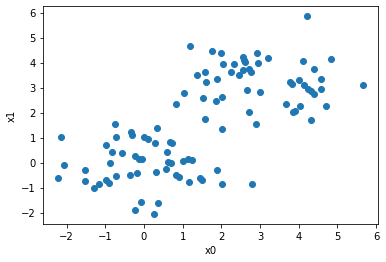

In [110]:
# Question 1:

pts = 50

rng = np.random.default_rng()

a = rng.multivariate_normal(
    mean=[3,3], 
    cov=[[1,0],
         [0,1]], 
    size=pts,
)

b = rng.multivariate_normal(
    mean=[0,0], 
    cov=[[1,0],
         [0,1]], 
    size=pts,
)

x = np.concatenate((a, b))

# Plot data 
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

# Question 2

Fix the bug in this k-mean clustering function and then plot the resulting color labeled clusters

In [ ]:
# Question 2:

def kmeans(x, k, no_of_iterations):  
    
    """ Function to implement k-means clustering 
    # x is a (num_samples, 2) numpy array 
    # k is number of clusters 
    # no_of_iterations is the number of iterations to run k means
    """
    
    idx = np.random.choice(len(x), k, replace=False)     
    #Randomly choosing Centroids     
    
    centroids = x[idx, :]       
    distances = cdist(x, centroids ,'euclidean')          
    points = np.array([np.argmax(i) for i in distances])  
    
    for _ in range(no_of_iterations):  
        
        centroids = []      
        
        for idx in range(k):     
            
            temp_cent = x[points==idx].mean(axis=1)   
            centroids.append(temp_cent) 
            centroids = np.vstack(centroids)  
            distances = cdist(x, centroids ,'euclidean')    
            
        points = np.array([np.argmax(i) for i in distances])              
            
    return points

points = kmeans(x,k=2,no_of_iterations=10)

cluster1 = x[points==0,:]
cluster2 = x[points==1,:]

# Plot data 
plt.scatter(cluster1[:, 0], cluster1[:, 1])
plt.scatter(cluster2[:, 0], cluster2[:, 1])
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()